# Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

The aim of the project is to analyze Zuber's competitors, and test hypothesis about impact of weather or ride frequency.

Hypotheses of the project is:-
###### "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
   

###### Step 4. Exploratory data analysis (Python)
In addition to the data you retrieved in the previous tasks, you've been given a second file. 

You now have these two CSVs:


          /datasets/project_sql_result_01.csv. 

It contains the following data:

  * company_name: taxi company name

  * trips_amount: the number of rides for each taxi company on November 15-16, 2017.


        /datasets/project_sql_result_04.csv. It contains the following data:


  * dropoff_location_name: Chicago neighborhoods where rides ended

  * average_trips: the average number of rides that ended in each neighborhood in November 2017.


For these two datasets you now need to

  * import the files
  
  * study the data they contain

  * make sure the data types are correct

  * identify the top 10 neighborhoods in terms of drop-offs

  * make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

  * draw conclusions based on each graph and explain the results


## Initialization

In [6]:
# Loading all the libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from pandas import Series, DataFrame

In [8]:
# Read the dataset
try:
    company = pd.read_csv('project_sql_result_01.csv')
    dropoff = pd.read_csv('project_sql_result_04.csv')
except Exception as e:
    print('The files are unable to import')
else:
    
    company = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
finally:
    print('The files are imported')

The files are unable to import
The files are imported


## Data description

The project contains the following DataFrame:


A database with info on taxi rides in Chicago:

The company DataFrame contains the following columns

* company_name: taxi company name
* trips_amount: the number of rides for each taxi company on November 15-16, 2017.


The dropoff DataFrame contains the following columns

* dropoff_location_name: Chicago neighborhoods where rides ended
* average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [20]:
# To know the number of columns and rows in the DataFrame
company.shape

(64, 2)

In [21]:
# To know the number of columns and rows in the DataFrame
dropoff.shape

(94, 2)

In [22]:
# Get information about the DataFrame
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [23]:
# Get information about the DataFrame
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [24]:
# Check data type of the DataFrame
company.dtypes

company_name    object
trips_amount     int64
dtype: object

In [25]:
# Check data type of the DataFrame
dropoff.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [26]:
# To get information about statistical character of the DataFrame
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [27]:
# To get information about statistical character of the DataFrame
dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [28]:
# Checking duplicates in the DataFrame
company.duplicated().sum()

0

In [29]:
# Checking duplicates in the DataFrame
dropoff.duplicated().sum()

0

In [30]:
# To confirm the missing values of the DataFrame
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [31]:
# To confirm the missing values of the DataFrame
dropoff.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [32]:
# To get the percentile information of the columns in the dataframe
company.isnull().sum()*100/len(company)


company_name    0.0
trips_amount    0.0
dtype: float64

In [33]:
# To get the percentile information of the columns in the dataframe
dropoff.isnull().sum()*100/len(dropoff)


dropoff_location_name    0.0
average_trips            0.0
dtype: float64

In [34]:
# Print a sample of DataFrame for gamess
company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [35]:
# Print a sample of DataFrame for gamess
dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


###### Conclusion
* The DataFrame company has 64 rows and 2 columns, the columns are company_name and trip_amount.
* The DataFrame dropoff has 94 rows and 2 columns, the columns are dropoff_location_name and average_trip.
* Both DataFrames, company and dropoff, have the right data types.
* The DataFrame company has object and int64 data types. 
* The DataFrame dropoff has object and float64 data types.
* It is confirmed that both the company and dropoff DataFrames have no duplicates in the data.
* It is confirmed that both the company and dropoff DataFrames have no missing values in the data. They are pretty clean.
* The number of rides for each taxi company on November 15-16, 2017 that is for two days was from 2 to 19,558. The mean and median for the company DataFrame (trip_amount) are 599 and 52 respectively, that is there is big difference.
* The average number of rides that ended in each neighborhood in November 2017 in Chicago ranges from 1.8 seconds to 10727 seconds (which is around 3 hours). The mean and median of the average_trip are 599 and 52 respectively. There is big difference.  


## Data Preprocessing

In [36]:
# To check whether column's name are written in appropriate way
company.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [37]:
# To check whether column's name are written in appropriate way
dropoff.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [38]:
company['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [39]:
company['trips_amount'].unique()

array([19558, 11422, 10367,  9888,  9299,  9181,  8448,  7701,  7455,
        5953,  5015,  4383,  3355,  3175,  2235,  2216,  2070,  1955,
        1775,  1607,  1486,  1404,  1296,  1259,  1014,   978,   428,
         402,   310,   250,   230,   210,   147,   146,   127,    39,
          37,    36,    33,    31,    29,    27,    25,    21,    20,
          16,    15,    14,    13,    12,    11,     8,     7,     5,
           3,     2])

In [40]:
dropoff['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [41]:
dropoff['average_trips'].unique()

array([1.07274667e+04, 9.52366667e+03, 6.66466667e+03, 5.16366667e+03,
       2.54690000e+03, 2.42096667e+03, 2.06853333e+03, 1.51000000e+03,
       1.36423333e+03, 1.25976667e+03, 1.24653333e+03, 1.21206667e+03,
       8.63700000e+02, 8.49666667e+02, 8.39833333e+02, 7.45400000e+02,
       6.20333333e+02, 5.83300000e+02, 5.16400000e+02, 4.69566667e+02,
       3.95533333e+02, 3.93266667e+02, 3.56733333e+02, 2.99033333e+02,
       2.98333333e+02, 2.96566667e+02, 2.55133333e+02, 2.08233333e+02,
       1.82600000e+02, 1.80900000e+02, 1.78900000e+02, 1.43300000e+02,
       1.42900000e+02, 1.19733333e+02, 9.78666667e+01, 9.52333333e+01,
       8.93666667e+01, 7.71000000e+01, 7.70333333e+01, 7.43333333e+01,
       7.43000000e+01, 6.78333333e+01, 6.57666667e+01, 6.40333333e+01,
       5.90333333e+01, 5.39666667e+01, 5.24333333e+01, 5.16000000e+01,
       4.44333333e+01, 4.35666667e+01, 4.05333333e+01, 3.61666667e+01,
       3.38000000e+01, 3.31034483e+01, 3.21666667e+01, 3.01666667e+01,
      

###### identify the top 10 neighborhoods in terms of drop-offs

The 10 Top dropoof locations can be obtained using sorting method and the descending order can be done by assigning ascending False.

In [42]:
# To get the top 10 dropoff locations
top10_dropoff_location = dropoff.sort_values(by = 'average_trips', ascending = False)
top10_dropoff_location.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [43]:
# To get the top 10 dropoff locations using rounding
top10_dropoff_location = dropoff.round(2).sort_values(by = 'average_trips', ascending = False)
top10_dropoff_location.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


In [44]:
# To get the bottom 10 dropoff locations
top10_dropoff_location = dropoff.sort_values(by = 'average_trips', ascending = True)
top10_dropoff_location.head(10)

,dropoff_location_name,average_trips
93,Riverdale,1.800000
92,East Side,1.961538
91,Burnside,2.333333
90,Hegewisch,3.117647
89,Mount Greenwood,3.137931
88,Undef,3.800000
87,Pullman,3.896552
86,West Elsdon,5.666667
85,Montclare,5.766667
84,West Pullman,6.466667


In [45]:
# To get the bottom 10 dropoff locations
company = company.sort_values(by = 'trips_amount', ascending = False)
company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


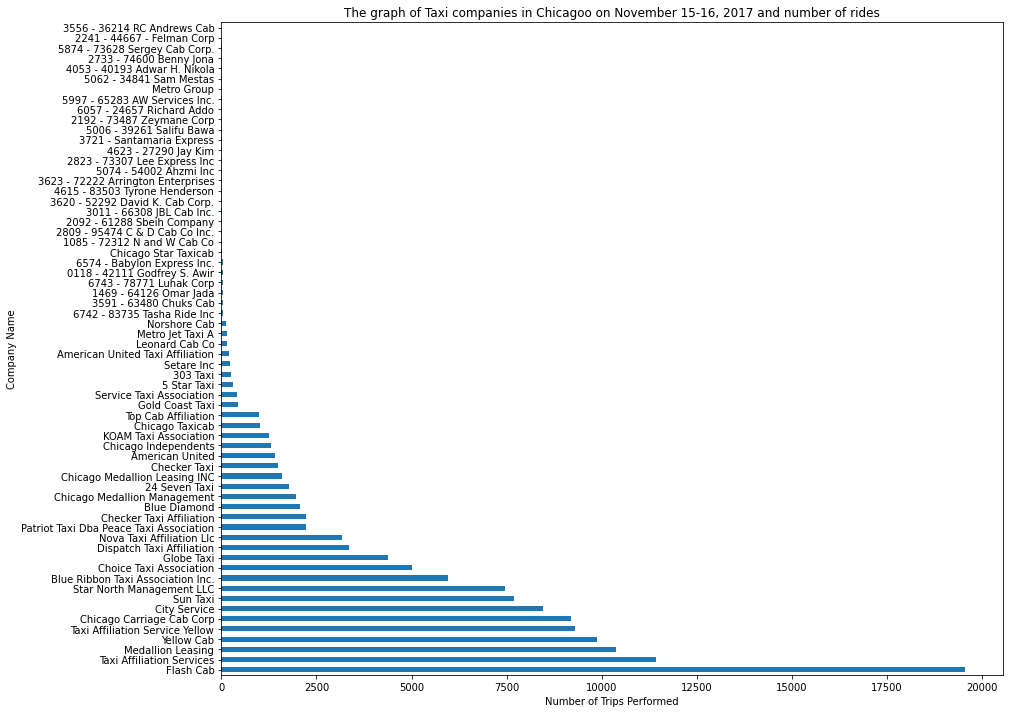

In [46]:
# Bar graph of the taxi companies and number of rides
company.plot.barh(x ='company_name', y='trips_amount', figsize=(14, 12), rot = 0, legend = False)
plt.title('The graph of Taxi companies in Chicagoo on November 15-16, 2017 and number of rides')
plt.xlabel('Number of Trips Performed')
plt.ylabel('Company Name')
plt.show()

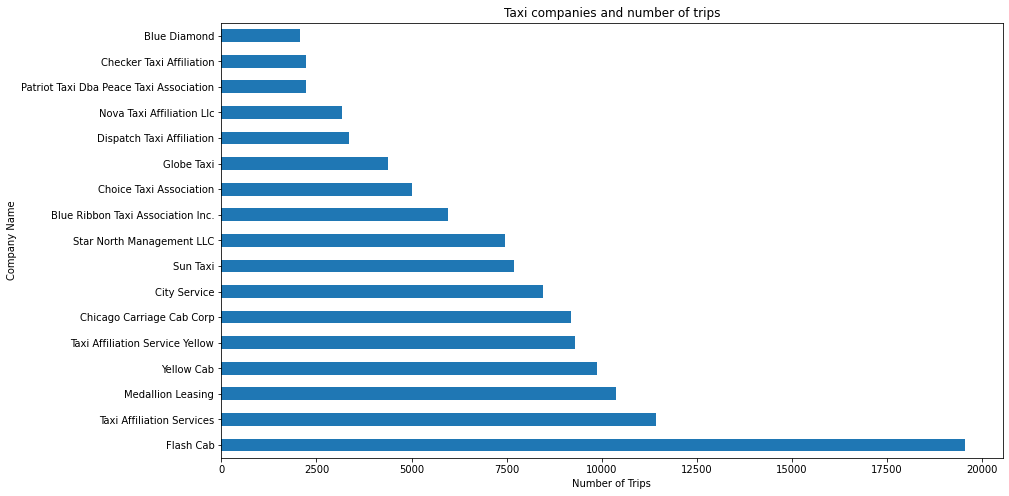

In [47]:
# Filtering Taxi companies performing more than 2000 number of trips 
company.query('trips_amount >= 2000').plot.barh(x = 'company_name', y = 'trips_amount', rot = 0, figsize = (14, 8), legend = False)
plt.title('Taxi companies and number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Company Name')
plt.show()


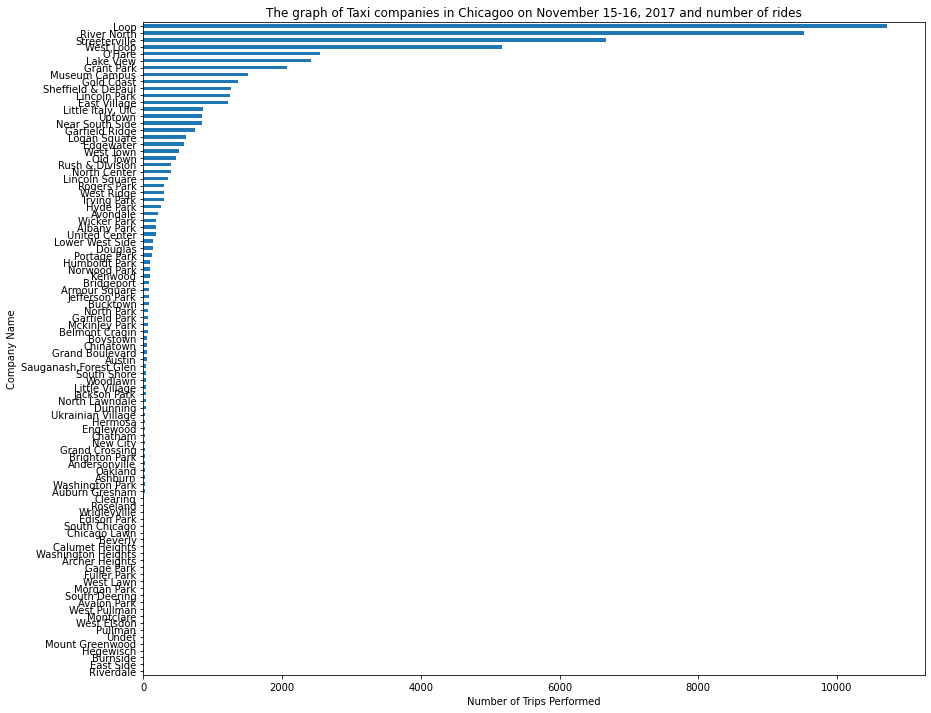

In [48]:
top10_dropoff_location.plot.barh(x ='dropoff_location_name', y='average_trips', figsize=(14, 12), legend = False)
plt.title('The graph of Taxi companies in Chicagoo on November 15-16, 2017 and number of rides')
plt.xlabel('Number of Trips Performed')
plt.ylabel('Company Name')
plt.show()

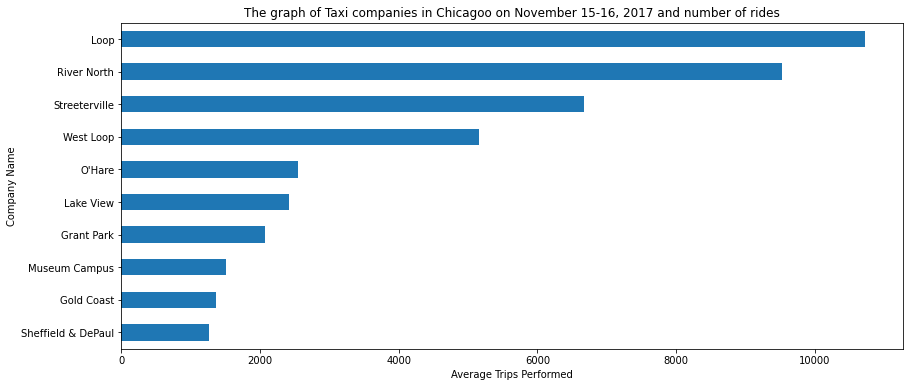

In [49]:
# Top 10 neighborhoods by number of dropoffs
top10_dropoff_location.query('average_trips >= 1250').plot.barh(x='dropoff_location_name', y='average_trips', figsize=(14, 6), legend = False)
plt.title('The graph of Taxi companies in Chicagoo on November 15-16, 2017 and number of rides')
plt.xlabel('Average Trips Performed')
plt.ylabel('Company Name')
plt.show()

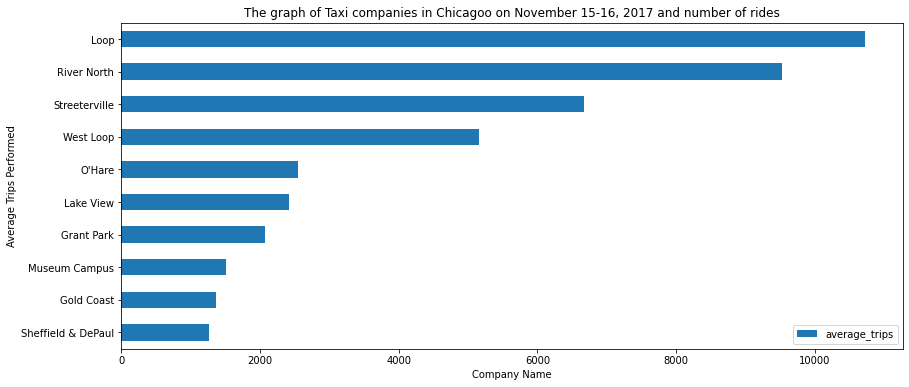

In [50]:
# Top 10 neighborhoods by number of dropoffs
top10_dropoff_location.query('average_trips >= 1250').plot.barh(x='dropoff_location_name', y='average_trips', rot=0, figsize=(14, 6))
plt.title('The graph of Taxi companies in Chicagoo on November 15-16, 2017 and number of rides')
plt.xlabel('Company Name')
plt.ylabel('Average Trips Performed')
plt.show()

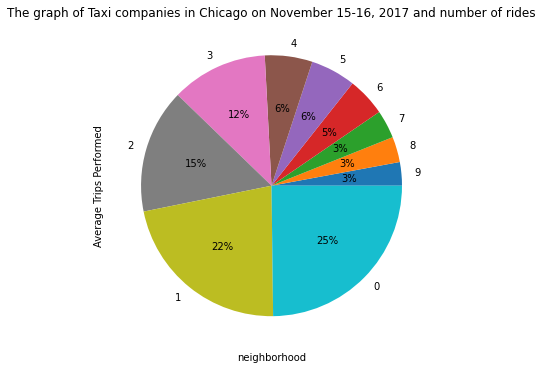

In [51]:
top10_dropoff_location.query('average_trips >= 1250').plot.pie(x='dropoff_location_name', y='average_trips', rot=0, figsize=(14, 6), autopct = '%1.0f%%', legend = False)
plt.title('The graph of Taxi companies in Chicago on November 15-16, 2017 and number of rides')
plt.xlabel('neighborhood')
plt.ylabel('Average Trips Performed')
plt.show()

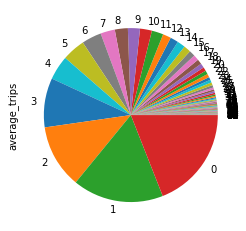

In [885]:
top10_dropoff_location.plot.pie(x='dropoff_location_name', y='average_trips', legend = False)
plt.show()

In [886]:
top10_dropoff_location_data = top10_dropoff_location['average_trips']
top10_dropoff_location_data.tail(8)

7     1510.000000
6     2068.533333
5     2420.966667
4     2546.900000
3     5163.666667
2     6664.666667
1     9523.666667
0    10727.466667
Name: average_trips, dtype: float64

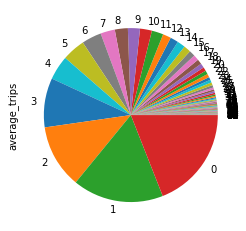

In [887]:
top10_dropoff_location_data.plot.pie()
plt.show()

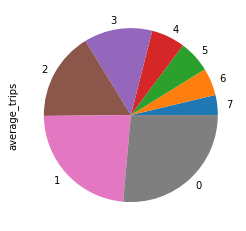

In [888]:
top10_dropoff_location_data.tail(8).plot.pie()
plt.show()

In [889]:
other_top10_dropoff_location = sum(top10_dropoff_location_data) - sum(top10_dropoff_location_data.tail(8))
other_top10_dropoff_location

15769.783783221508

In [890]:
series1 = top10_dropoff_location_data.tail(8)
series1

7     1510.000000
6     2068.533333
5     2420.966667
4     2546.900000
3     5163.666667
2     6664.666667
1     9523.666667
0    10727.466667
Name: average_trips, dtype: float64

In [891]:
series2 = Series([other_top10_dropoff_location], index = ['others'])
series2

others    15769.783783
dtype: float64

In [892]:
plot_data = pd.concat([series1, series2])
plot_data

7          1510.000000
6          2068.533333
5          2420.966667
4          2546.900000
3          5163.666667
2          6664.666667
1          9523.666667
0         10727.466667
others    15769.783783
dtype: float64

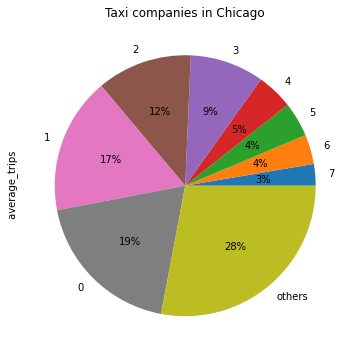

In [893]:
plot_data.plot.pie(figsize=(6,6), autopct = '%1.0f%%', label =' average_trips', title = 'Taxi companies in Chicago')
plt.show()

###### Conclusion

 * The bar graphs show, the most 10 popular dropoff locations in Chicago on November 15-16, 2017 were Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield and DePaul.
 
 * The droppoff location with the lowest average trip is Riverdale (1.8 second).
 
 * The top five popular Taxi companies in Chicago on November 15-16, 2017 were Flash Cap, Taxi Affiliation Services, Medallion Leasing, Yellow Cap and Taxi Affiliation Service Yellow. 

###### Step 5. Testing hypotheses (Python)


            /datasets/project_sql_result_07.csv — the result of the last query. 
  
  It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
  
    * start_ts - pickup date and time
  
    * weather_conditions - weather conditions at the moment the ride started
  
    * duration_seconds - ride duration in seconds
  
 
 ###### Test the hypothesis:
 
 
    "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
    
     Decide where to set the significance level (alpha) on your own.
     
###### Explain:

  * How you formed the null and alternative hypotheses
  
  * What criterion you used to test the hypotheses and why


In [894]:
# Read the dataset
try:
    rides = pd.read_csv('project_sql_result_07.csv')
except:
    rides = pd.read_csv('/datasets/project_sql_result_07.csv')

In [895]:
# Print the general/summary information about the games DataFrame
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [896]:
# To know the number of columns and rows in the DataFrame
rides.shape

(1068, 3)

In [897]:
rides.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [898]:
# Check data type of the DataFrame
rides.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [899]:
# To get information about statistical character of the DataFrame
rides.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [900]:
# Checking duplicates
rides.duplicated().sum()

197

In [901]:
# To confirm the missing values of the DataFrame
rides.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [902]:
# To get the percentile information of the columns in the dataframe
rides.isnull().sum()*100/len(rides)


start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64

In [903]:
# Print a sample of DataFrame for rides
rides.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [904]:
# To check whether column's name are written in appropriate way
rides.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [905]:
#find duplicate rows across all columns
duplicateRows = rides[rides.duplicated()]
duplicateRows 

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [906]:
# To remove the duplicates we use df.drop_duplicates()
rides_data = rides.drop_duplicates()
rides_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [907]:
# Checking duplicates
rides_data.duplicated().sum()

0

In [908]:
# Print a sample of the DataFrame after dropping the duplicates
rides_data.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [909]:
# General information about the data
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB


In [910]:
# Check data type of the DataFrame
rides_data.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

The data type of start_ts is supposed to be datetime. It should be converted from object to datetime data type. 

In [911]:
# Converting the datatype of start_ts from object to datetime
rides_data['start_ts'] = pd.to_datetime(rides_data['start_ts'], format='%Y-%m-%d %H:%M:%S')
warnings.filterwarnings('ignore')


In [912]:
# To confirm whether the data type is converted
rides_data.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

In [913]:
# To confirm whether the data type is converted
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


It is confirmed all the duplicates are dropped.

In [914]:
# To get the statistical character of the DataFrame
rides_data.describe()

,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


The values of the column 'duration_seconds' range from 0 to 7440

In [915]:
# To get the 'duration_seconds' column zero values
rides_data[rides_data['duration_seconds'] == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [916]:
# To get the exact number of 'duration_seconds' column with zero values, we shoud use shape methode
rides_data[rides_data['duration_seconds'] == 0].shape

(6, 3)

It is confirmed the 'duration_seconds' column have 6 rows with zero values.

In [917]:
# To get a percentage of a particular value occurance in a column
rides_data['weather_conditions'].value_counts(normalize=True) * 100

Good    83.008037
Bad     16.991963
Name: weather_conditions, dtype: float64

In [918]:
rides_data.shape

(871, 3)

###### Conclusion
* The DataFrame rides has 1068 rows and 3 columns, the columns are 'start_ts', 'weather_conditions', and 'duration_seconds'.
* The DataFrame rides has object and float64 data types.
* The data type of start_ts needs to be converted from object into datetime data type.
* There are no missing values in the DataFrame.
* It is confirmed that the DataFrame has 197 duplicates.
* Minimum values of the column 'duration_seconds' is 0 and its maximum value is 7440 seconds
* There are 6 rows of the 'duration_seconds' with 0 values.
* The 197 duplicates are dropped from the DataFrame.
* The DataFrame rides_data remains with 871 rows and 3 columns after the duplicates are removed.
* The ratio of Good weather is 83.00% and Bad weather is 16.99%.

## Test statistical hypotheses

Comparing the average duration of rides from Loop to O'Hare International Airport changes on rainy Saturday is not enough to make decission, we need to perform a statistical test using hypothesis on the equality of two population.


In order to test the hypothesis of two statistical population that are equal based on the sample we use,

scripy.stats.ttest_ind(array1, array2, equal_var)



###### Hypotheses 

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Based on this one, we can formulate:

Null hypothesis H0: The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays

Alternative hypothesis H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

Alpha value will be 5%.

Statistical test is: Hypothesis on equality of two population.

First I will apply Levene's test. Levene's test for equality of variance is a test of whether the variance of two samples or groups are approximately equal or homogenous. The independent sample t-test assumes that the variances of the sample groups are approximately equal or that the samples have homogeneity of variance. 

In [919]:
# Test the hypotheses
# The two DataFrames to be tested are 
# Levene's test to test the equality of variance in the two samples

rides_data_good_weather = rides_data.query('weather_conditions == "Good"')
rides_data_bad_weather = rides_data.query('weather_conditions == "Bad"')

alpha = 0.05 # critical statistical significance level

result = st.levene(rides_data_good_weather['duration_seconds'], rides_data_bad_weather['duration_seconds'], center='mean')

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are approximately the same')
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 0.923187722044537
The variances are approximately the same


Handling the second test using the value of alpha 0.01.

In [920]:
# Test the hypotheses
# The two DataFrames to be tested are 
# Levene's test to test the equality of variance in the two samples

rides_data_good_weather = rides_data.query('weather_conditions == "Good"')
rides_data_bad_weather = rides_data.query('weather_conditions == "Bad"')

alpha = 0.01 # critical statistical significance level

result = st.levene(rides_data_good_weather['duration_seconds'], rides_data_bad_weather['duration_seconds'], center='mean')

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are approximately the same')
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 0.923187722044537
The variances are approximately the same


The p-value is greater than 0.05 alpha so it can be considered that the variances of the sample hypothesis test is homogenous.

In the second test the value of alpha is taken 0.01 in order to confirm the test. In the second test even the p-value is greater than 0.01 alpha so it can be considered that the variances of the sample hypothesis test is homogenous even though the value of alpha changed from 0.05 to 0.01.

In [921]:
# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

rides_data_good_weather = rides_data.query('weather_conditions == "Good"')
rides_data_bad_weather = rides_data.query('weather_conditions == "Bad"')

alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(rides_data_good_weather['duration_seconds'], rides_data_bad_weather['duration_seconds'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  7.397770692813604e-08
We reject the null hypothesis


Handling the second test using the value of alpha 0.01.

In [922]:
# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

rides_data_good_weather = rides_data.query('weather_conditions == "Good"')
rides_data_bad_weather = rides_data.query('weather_conditions == "Bad"')

alpha = 0.01  # critical statistical significance level

results = st.ttest_ind(rides_data_good_weather['duration_seconds'], rides_data_bad_weather['duration_seconds'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  7.397770692813604e-08
We reject the null hypothesis


The value of alpha changed into 0.01 value in order to confirm that if there is change in the result of the test but there is no change still the p_value is less than alpha and the hypothesis is rejected.

In [923]:
# Mean value
rides_data_good_weather['duration_seconds'].mean()

2032.253112033195

In [924]:
# Mean value
rides_data_bad_weather['duration_seconds'].mean()

2409.2297297297296

In [925]:
# Variance value
rides_data_good_weather['duration_seconds'].var()

598216.951081022

In [926]:
# Variance value
rides_data_bad_weather['duration_seconds'].var()

564819.443463872

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because average ride on Good weather and Bad weather are not the same, which means that the averages of good weather ride and bad weather ride are different. The average values of good weather ride and bad weather ride are 2032.253112033195 and 2409.2297297297296 respectively, which are different.

From Levene's Test it is confirmed that, since the p-value is greater than 0.05 alpha, it can be considered that the variances of the sample hypothesis test is homogenous.

The value of the alpha is taken as 0.01 to test the hypothesis, still the result shows p-values is less than the value of alpha as a result the Null hypothesis is rejected. 

## General conclusion


* The DataFrame company has 64 rows and 2 columns, the columns are company_name and trip_amount.
* The DataFrame dropoff has 94 rows and 2 columns, the columns are dropoff_location_name and average_trip.
* Both DataFrames, company and dropoff, have the right data types.
* It is confirmed that both the company and dropoff DataFrames have no duplicates in the data.
* It is confirmed that both the company and dropoff DataFrames have no missing values in the data. They are pretty clean.
* The number of rides for each taxi company on November 15-16, 2017 that is for two days was from 2 to 19,558. The mean and median for the company DataFrame (trip_amount) are 599 and 52 respectively, that is there is big difference.

* The average number of rides that ended in each neighborhood in November 2017 in Chicago ranges from 1.8 seconds to 10727 seconds (which is around 3 hours). The mean and median of the average_trip are 599 and 52 respectively. There is big difference.  

* The result shows, the most 10 popular dropoff locations in Chicago on November 15-16, 2017 were Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield and DePaul.
 
* The result shows, the top five popular Taxi companies in Chicago on November 15-16, 2017 were Flash Cap, Taxi Affiliation Services, Medallion Leasing, Yellow Cap and Taxi Affiliation Service Yellow. 
 
* The DataFrame rides has 1068 rows and 3 columns, the columns are 'start_ts', 'weather_conditions', and 'duration_seconds'.
* The data type of start_ts converted from object into datetime data type.
* There are no missing values in the DataFrame.
* It is confirmed that the DataFrame has 197 duplicates.
* Minimum values of the column 'duration_seconds' is 0 and its maximum value is 7440 seconds
* There are 6 rows of the 'duration_seconds' with 0 values.
* The 197 duplicates are dropped from the DataFrame.
* The ratio of Good weather is 83.00% and Bad weather is 16.99%.

* From Levene's Test it is confirmed that, since the p-value is greater than 0.05 alpha, it can be considered that the variances of the sample hypothesis test is homogenous.

* The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because average ride on Good weather and Bad weather are not the same, which means that the averages of both good weather ride and bad weather ride are different. The average values of good weather ride and bad weather ride are 2032.253112033195 and 2409.2297297297296 respectively, which are different.


* The value of alpha is taken 0.01 in the second test and the result shows the value of p-value is less than alpha so the Null hypothesis is also rejected. 

* It can be concluded that, there is evidence to show that the results are statisically significant; therefore, we reject the Null hypothesis and uphold the Alternative hypothesis 
###### "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
